In [51]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv

In [52]:
folder_path = '../../../Images/class samples/No Blur/Single_Samples'
class_names = ['SUV', 'Pickup', 'Sedan', 'Convertible']

In [53]:
#load the dataset subset
def load_and_classify_images(folder, class_names):
    class_images = {class_name: [] for class_name in class_names}
    for filename in os.listdir(folder):
        for class_name in class_names:
            if filename.startswith(class_name):
                img_path = os.path.join(folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    class_images[class_name].append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return class_images

def plot_images_in_grid(class_images):
    for class_name, images in class_images.items():
        plt.figure(figsize=(10, 5))
        for i, img in enumerate(images, 1):
            plt.subplot(1, len(images), i)
            plt.imshow(img)
            plt.axis('off')
        plt.suptitle(class_name)
        plt.show()

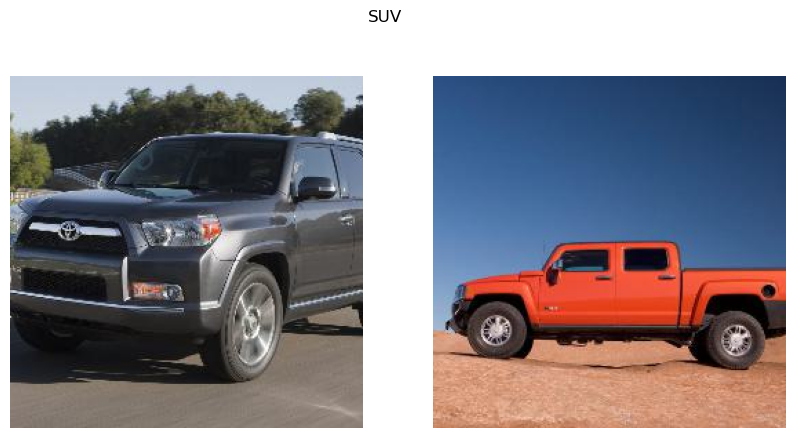

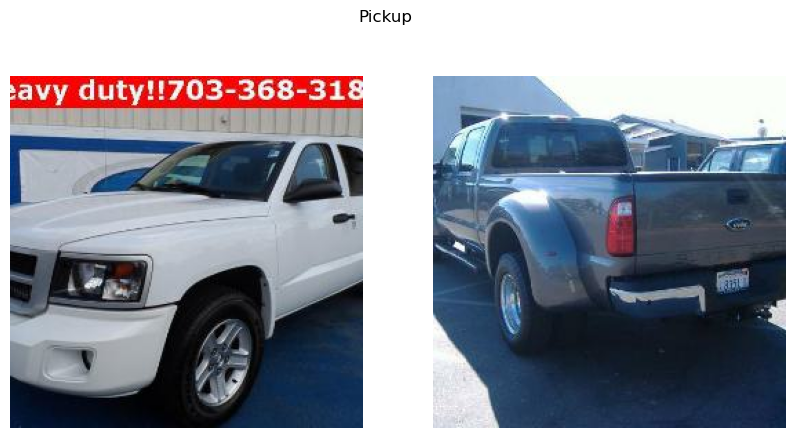

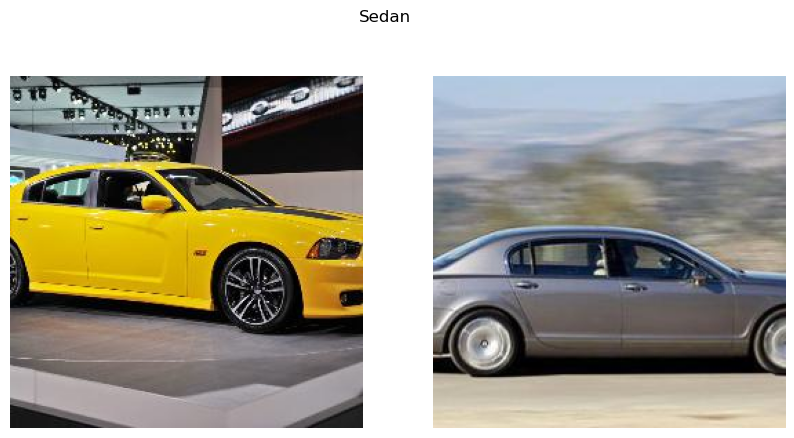

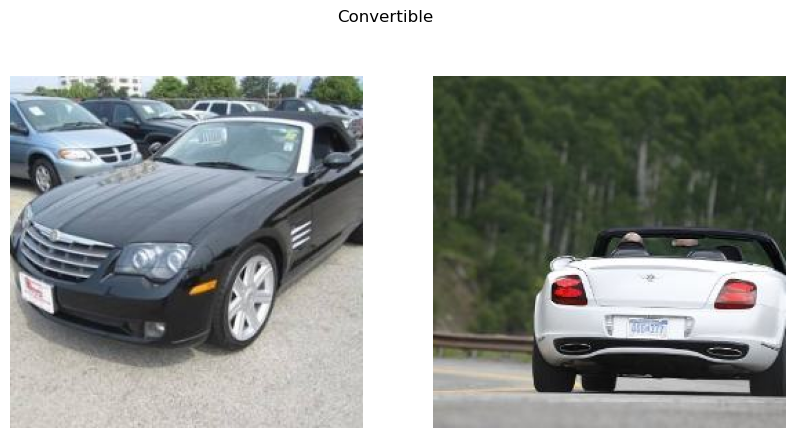

In [54]:
#viz train images 
class_images = load_and_classify_images(folder_path, class_names)
plot_images_in_grid(class_images)

In [55]:
def convert_to_hsv_and_visualize(class_images):
    class_hsv_images = {}
    for class_name, images in class_images.items():
        hsv_images = [rgb2hsv(img) for img in images]
        class_hsv_images[class_name] = hsv_images
        plot_images_in_grid({class_name: hsv_images})
    return class_hsv_images

In [56]:
def compute_hsv_histograms(hsv_images):
    histograms = []
    for hsv in hsv_images:
        hist_hue = np.histogram(hsv[:, :, 0], bins=256, range=(0, 1))
        hist_saturation = np.histogram(hsv[:, :, 1], bins=256, range=(0, 1))
        hist_value = np.histogram(hsv[:, :, 2], bins=256, range=(0, 1))
        histograms.append((hist_hue, hist_saturation, hist_value))
    return histograms

In [57]:
def plot_hsv_histograms(class_hsv_images):
    for class_name, hsv_images in class_hsv_images.items():
        plt.figure(figsize=(15, 5))
        for i, hsv in enumerate(hsv_images, 1):
            hist_hue = np.histogram(hsv[:, :, 0], bins=256, range=(0, 1))
            hist_saturation = np.histogram(hsv[:, :, 1], bins=256, range=(0, 1))
            hist_value = np.histogram(hsv[:, :, 2], bins=256, range=(0, 1))

            plt.subplot(1, len(hsv_images), i)
            plt.plot(hist_hue[1][:-1], hist_hue[0], color='r', label='Hue')
            plt.plot(hist_saturation[1][:-1], hist_saturation[0], color='g', label='Saturation')
            plt.plot(hist_value[1][:-1], hist_value[0], color='b', label='Value')
            plt.legend()
        plt.suptitle(f'{class_name} HSV Histograms')
        plt.show()

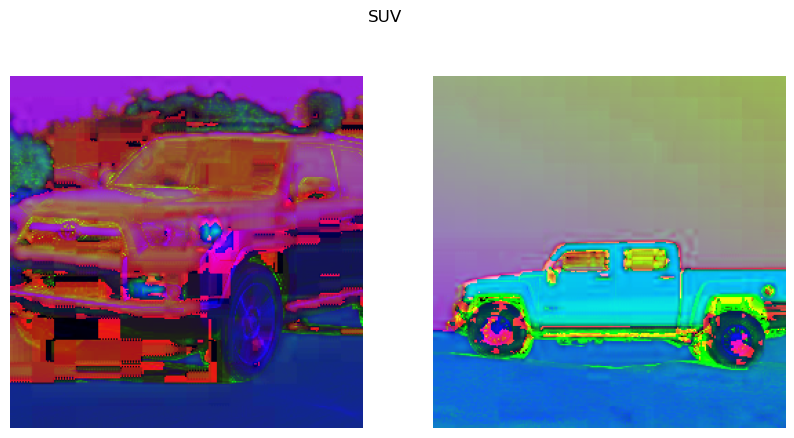

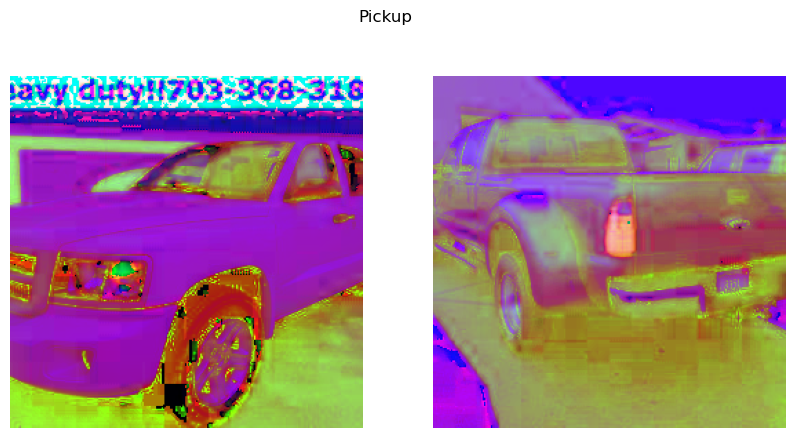

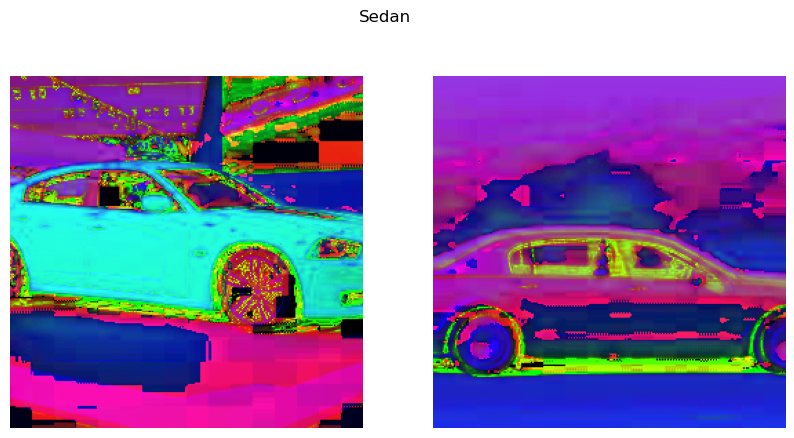

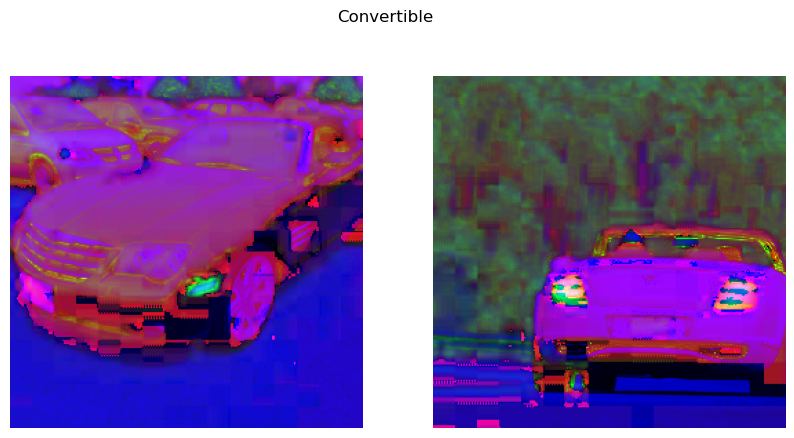

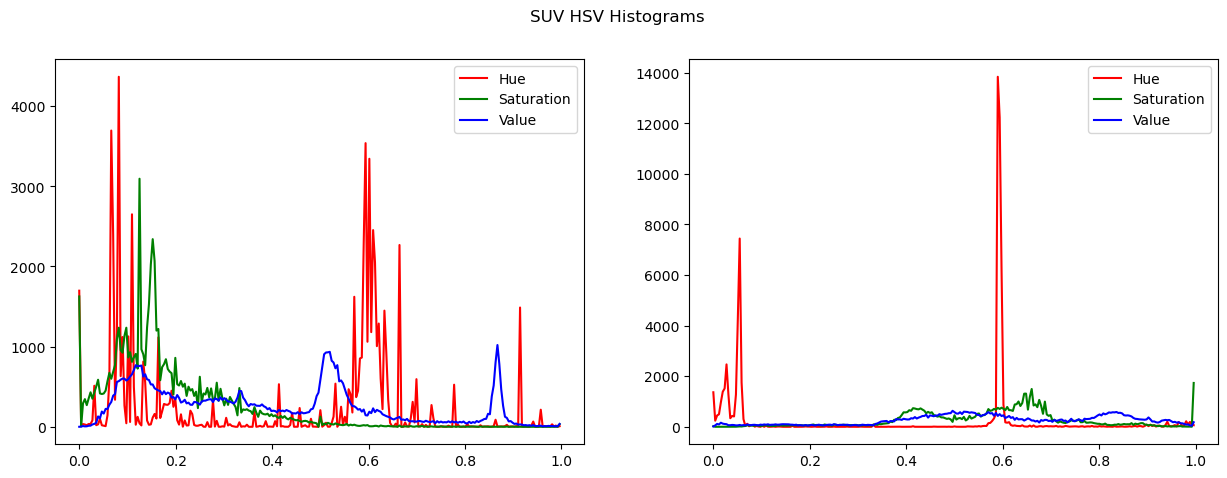

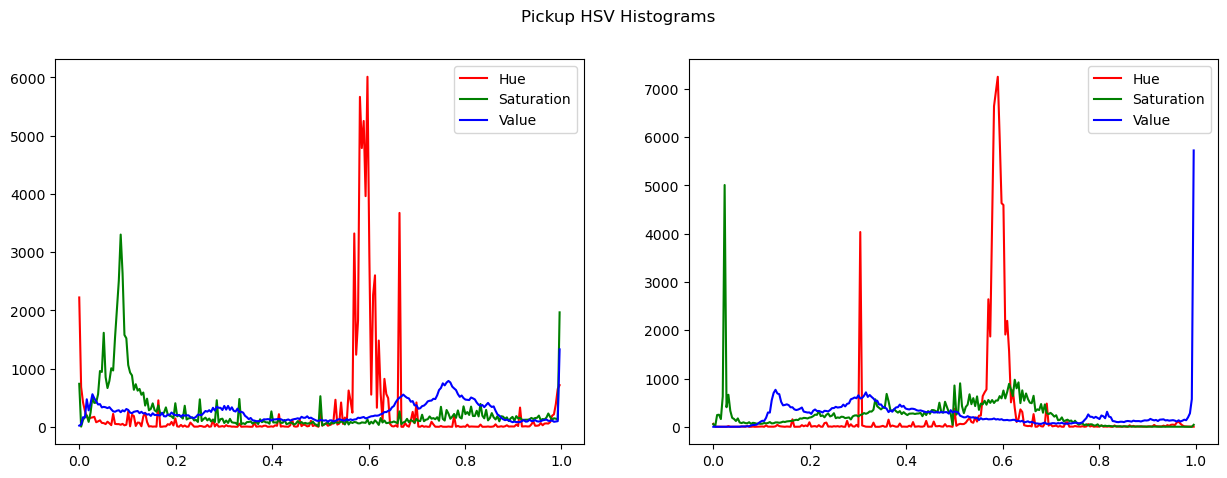

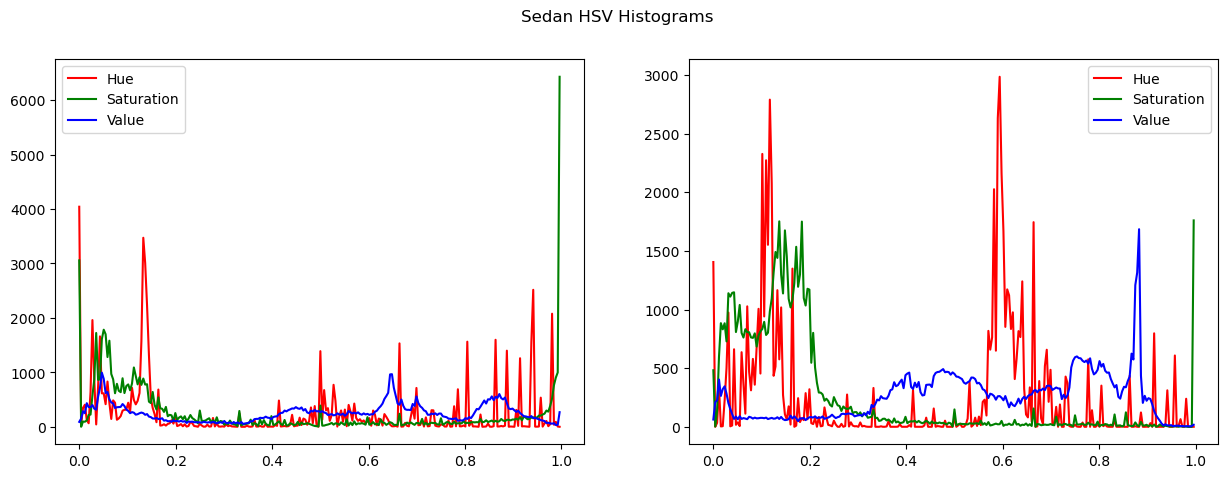

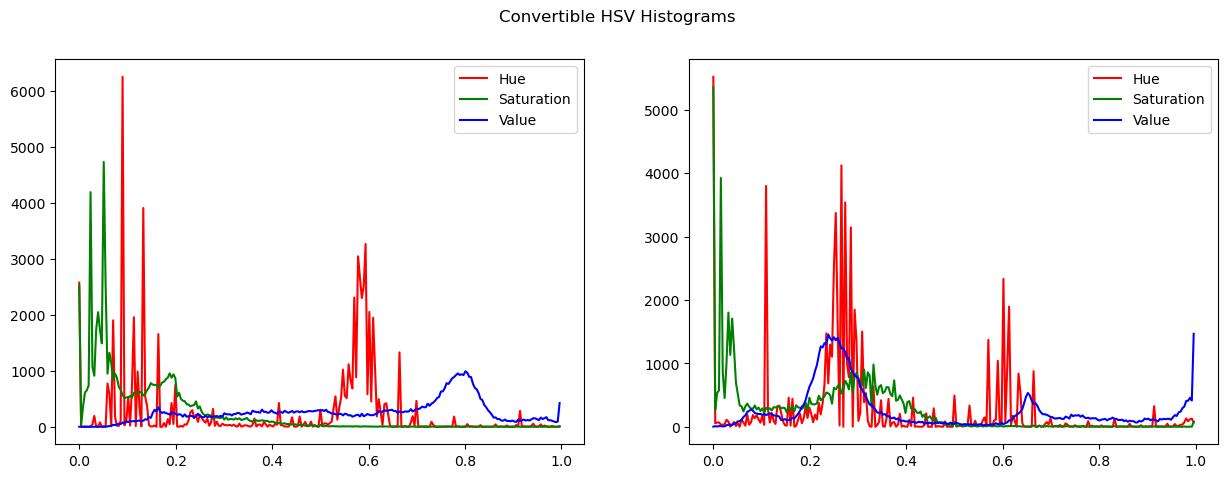

In [58]:
class_hsv_images = convert_to_hsv_and_visualize(class_images)
plot_hsv_histograms(class_hsv_images)